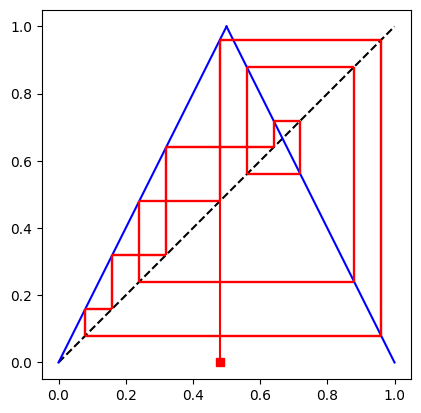

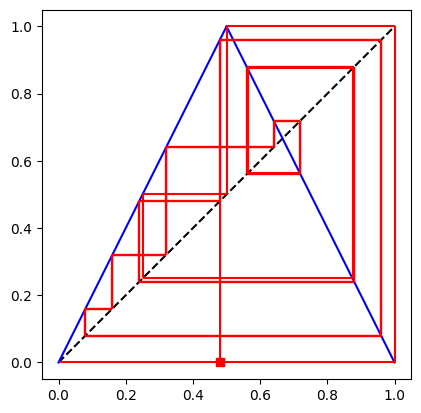

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def an_grafico(p,n,cont):
    if cont==1:
        # p inicial
        plt.plot(p[0],p[1],'sr')
        # 45º
        x = np.arange(0,1.01,0.01)
        y = x
        plt.plot(x,y,linestyle='dashed',color='black')
        # Tienda [0,0.5)
        x1 = np.arange(0,0.51,0.01)
        plt.plot([x for x in x1],[tienda(y) for y in x1],'b')
        # Tienda [0.5,1]
        x2 = np.arange(0.5,1.01,0.01)
        plt.plot([x for x in x2],[tienda(y) for y in x2],'b')
    if n>0:
        if cont%2==0:  # Par -> horiz
            id2 = [p[1],p[1]]
            plt.hlines(id2[1],id2[0],p[0],'r')
            an_grafico(id2,n-1,cont+1)
        else:  # Impar -> vert
            id2=[p[0],tienda(p[0])]
            plt.vlines(id2[0],p[1],id2[1],'r')
            an_grafico(id2,n-1,cont+1)

    plt.show()

plt.figure
ax = plt.subplot(111)
ax.set_aspect(1)

an_grafico([0.48,0],90,1)

plt.figure
ax = plt.subplot(111)
ax.set_aspect(1)

an_grafico([0.48,0],120,1)

Parece que despues de un numero de iteraciones los errores de redondeo se acumulan y la funcion acaba convergiedo a 0 aunque no deberia

# Ejercicio 1

## Sensibilidad respecto al dato inicial

In [77]:
from decimal import *

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def orbita(x1,x2,x3,n,m):
  for i in range(n):
    if i>=m:
      print('x1 iteracion',i,':',x1)
      print('x2 iteracion',i,':',x2)
      print('x3 iteracion',i,':',x3)
    x1 = tienda(x1)
    x2 = tienda(x2)
    x3 = tienda(x3)

p = Decimal(0.48)
eps = Decimal(1e-4)
orbita(p,p+eps,p-eps,50,47)
print()
orbita(p,p+eps,p-eps,75,72)

x1 iteracion 47 : 0.562499999999999647502303232
x2 iteracion 47 : 0.970300674438462505459122176
x3 iteracion 47 : 0.095300674438461800463728640
x1 iteracion 48 : 0.875000000000000704995393536
x2 iteracion 48 : 0.059398651123074989081755648
x3 iteracion 48 : 0.190601348876923600927457280
x1 iteracion 49 : 0.249999999999998590009212928
x2 iteracion 49 : 0.118797302246149978163511296
x3 iteracion 49 : 0.381202697753847201854914560

x1 iteracion 72 : 1.1827859996358475776E-8
x2 iteracion 72 : 4.71676022256165715968E-7
x3 iteracion 72 : 4.95331742248882667520E-7
x1 iteracion 73 : 2.3655719992716951552E-8
x2 iteracion 73 : 9.43352044512331431936E-7
x3 iteracion 73 : 9.90663484497765335040E-7
x1 iteracion 74 : 4.7311439985433903104E-8
x2 iteracion 74 : 0.000001886704089024662863872
x3 iteracion 74 : 0.000001981326968995530670080


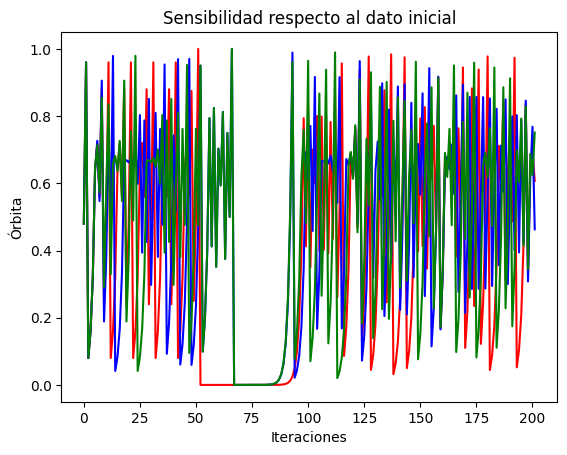

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import *

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def orbita_graf(x1,x2,x3,n):
  l1=[x1]
  l2=[x2]
  l3=[x3]
  aux1 = x1
  aux2 = x2
  aux3 = x3
  for i in range(n+1):
    aux1 = tienda(aux1)
    aux2 = tienda(aux2)
    aux3 = tienda(aux3)
    l1.append(aux1)
    l2.append(aux2)
    l3.append(aux3)

  plt.xlabel('Iteraciones')
  plt.ylabel('Órbita')
  plt.title('Sensibilidad respecto al dato inicial')

  plt.plot(np.arange(0,len(l1),1), [i for i in l1],'r')
  plt.plot(np.arange(0,len(l2),1), [i for i in l2],'b')
  plt.plot(np.arange(0,len(l3),1), [i for i in l3],'g')

eps = Decimal(1e-4)
x = Decimal(0.48)
orbita_graf(x,x+eps,x-eps,200)

La funcion tienda T es sensible a las condiciones iniciales.

## Analisis de los numeros racionales 1/12 y 1/34

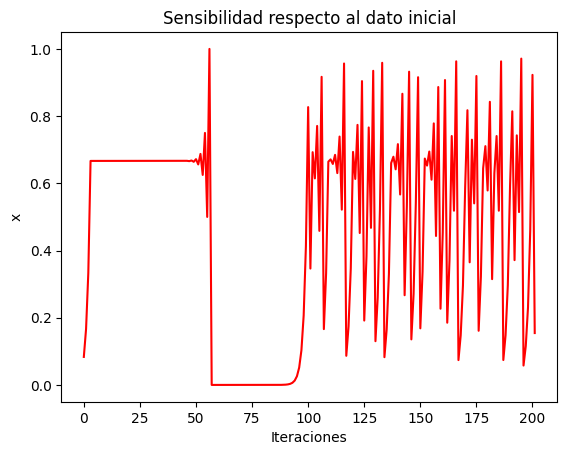

In [79]:
import matplotlib.pyplot as plt
from decimal import *
import numpy as np

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def orbita_graf2(x,n):
  l=[x]
  aux = x
  for i in range(n+1):
    aux = tienda(aux)
    l.append(aux)

  plt.xlabel('Iteraciones')
  plt.ylabel('x')
  plt.title('Sensibilidad respecto al dato inicial')

  plt.plot(np.arange(0,len(l),1), [i for i in l],'r')

orbita_graf2(Decimal(1/12),200)

x = 1/12 es un punto eventualmente periódico

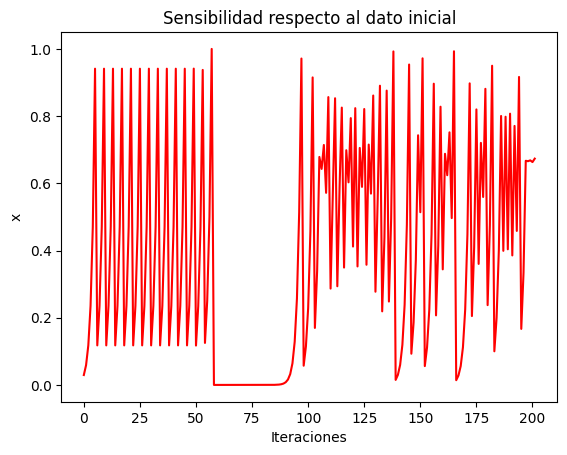

In [80]:
orbita_graf2(Decimal(1/34),200)

x = 1/34 es eventualmente periodico

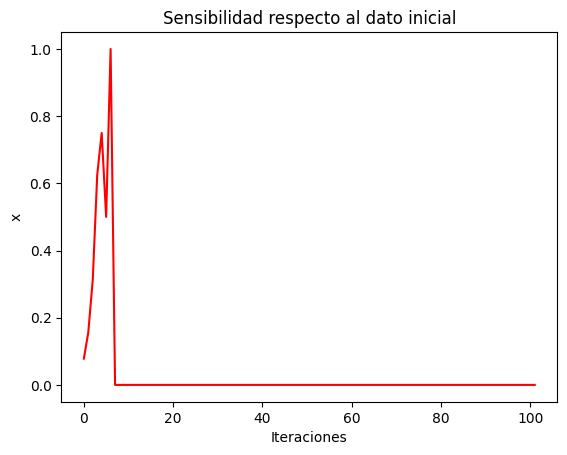

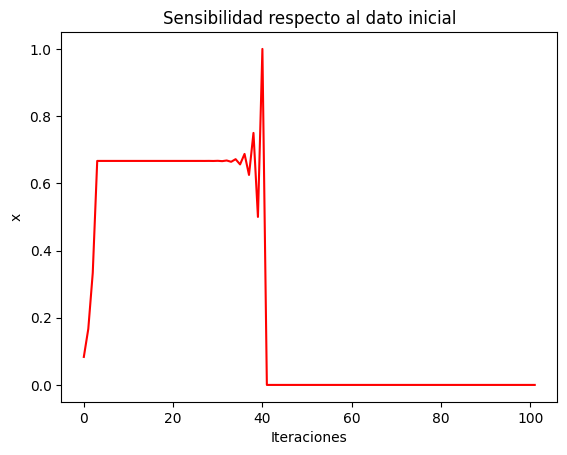

In [88]:
from sympy import *

plt.figure()
# 0 decimales
orbita_graf2(N((1/12),0),100)
plt.figure()
# 10 decimales
orbita_graf2(N(1/12,10),100)

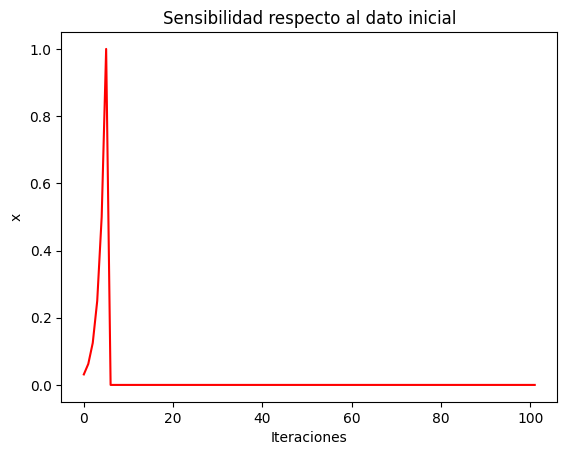

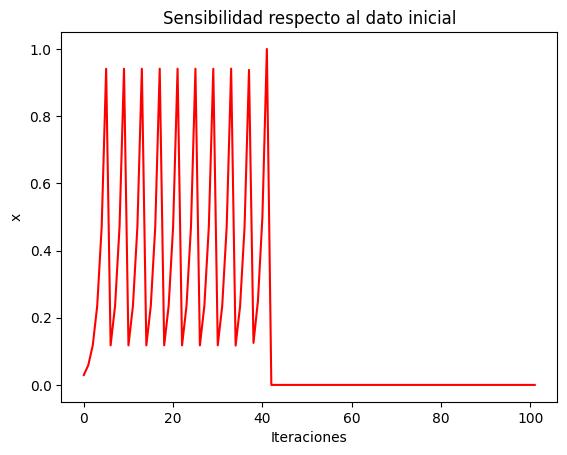

In [89]:
plt.figure()
# 0 decimales
orbita_graf2(N(1/34,0),100)
plt.figure()
# 10 decimales
orbita_graf2(N(1/34,10),100)

Si no se usan todos los decimales se producen errores graves, en este caso, la función converge a 0.

## Analisis numerico y grafico de la funcion tienda T

5 ciclo con x = 0.9677124023437500000

Iteracion 0 : 0.9677410125732421875
Iteracion 1 : 0.0645179748535156250
Iteracion 2 : 0.1290359497070312500
Iteracion 3 : 0.2580718994140625000
Iteracion 4 : 0.5161437988281250000
Iteracion 5 : 0.9677124023437500000
Iteracion 6 : 0.0645751953125000000
Iteracion 7 : 0.1291503906250000000
Iteracion 8 : 0.2583007812500000000
Iteracion 9 : 0.5166015625000000000

5 ciclo con x = 0.1935424804687500000

Iteracion 0 : 0.1935482025146484375
Iteracion 1 : 0.3870964050292968750
Iteracion 2 : 0.7741928100585937500
Iteracion 3 : 0.4516143798828125000
Iteracion 4 : 0.9032287597656250000
Iteracion 5 : 0.1935424804687500000
Iteracion 6 : 0.3870849609375000000
Iteracion 7 : 0.7741699218750000000
Iteracion 8 : 0.4516601562500000000
Iteracion 9 : 0.9033203125000000000


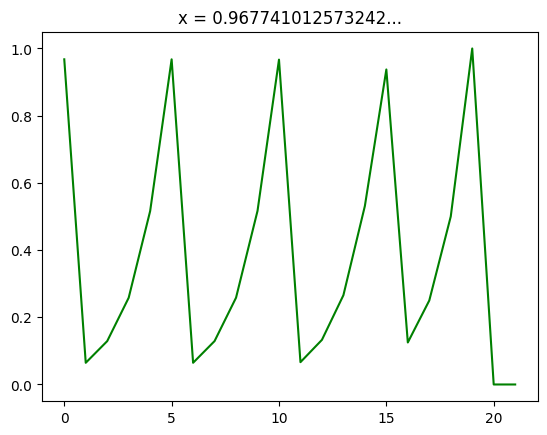

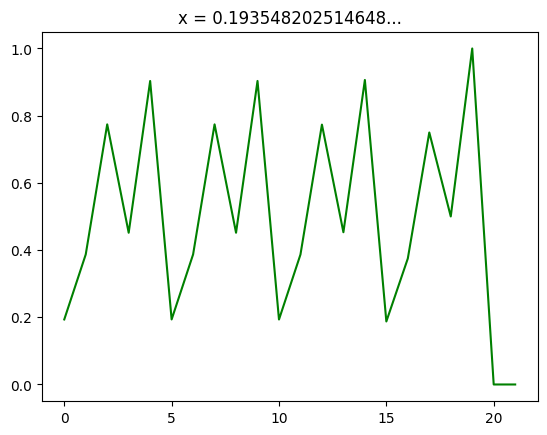

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import *

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def orbita_num(x,n,m):
  for i in range(n):
    if i>=m:
      print('Iteracion',i,':',x)
    x = tienda(x)

def orbita(x,n):
  aux = x
  while True:
    n+=1
    aux = tienda(aux)
    if abs(aux-x)<1e-4:
      print(n,'ciclo con x =',aux)
      break

def orbita_graf_av(x,n,m):
  l=[x]
  aux = x
  for i in range(n+1):
    aux = tienda(aux)
    if i>=m:
      l.append(aux)

  plt.title('x = %.15g...'%x)
  plt.plot(np.arange(0,len(l),1), [i for i in l],'g')


x = Decimal(0b1111011110111101111 / 2**19)
x2 = Decimal(0b0011000110001100011 / 2**19)
orbita(x,0)
print()
orbita_num(x,10,0)

print()
orbita(x2,0)
print()
orbita_num(x2,10,0)

orbita_graf_av(x,20,0)
plt.figure()
orbita_graf_av(x2,20,0)

## Construir orbita periodica con U = (1/256, 1/128) y V = (127/128, 255/256)

In [34]:
import math
from decimal import *

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def orb_per(u,v,n):
  x = Decimal(u+Decimal(1e-7)) # 1) Asegurar que x pertenece a U
  auxU = x
  l=[x]
  while True: # 2) Encontrar una orbita periodica
    n+=1
    auxU = tienda(auxU)
    l.append(auxU)
    if abs(auxU-x)<1e-7:
      break
  aux=0
  for elem in l:
    if abs(elem-v)<1e-7: # 3) Comprobar si T^k(x) pertenece a V
      print('Topologicamente transitivo con',n,'ciclo')
      aux=1
      break
  if aux==0:
    print('No topologicamente transitivo con',n,'ciclo')

orb_per(Decimal(1/256),Decimal(1/128),0)
orb_per(Decimal(127/128),Decimal(255/256),0)

Topologicamente transitivo con 3750095 ciclo
Topologicamente transitivo con 9930627 ciclo


# Ejercicio 2

## h(T (x)) = f (h(x)) para todo x ∈ [0, 1]

In [11]:
import math
import numpy as np

def f(x):
  return 4*x*(1-x)

def h(x):
  return math.sin((math.pi/2)*x)**2

def tienda(x):
  if 0<=x and x<0.5:
    return 2*x
  else:
    return 2-2*x

def conj():
  aux=1
  x = np.arange(0,1.01,0.01)
  for i in x:
    if abs(f(h(i))-h(tienda(i)))>=1e-7:
      aux=0
      break
  if aux:
    print('Los sistemas dinamicos son conjugados')
  else:
    print('Los sistemas dinamicos no son conjugados')

conj()

Los sistemas dinamicos son conjugados


## Puntos periodicos de periodicos 3, 5 y 7 para la funcion f

T cumple que para cualquier U y V abiertos de [0,1] existe una órbita periódica que visita ambos, por lo que también lo cumplirá f al ser topoloficamente conjugadas mediante h.

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import *

def tienda(x):
  if 0<=x and x<0.5:
    return Decimal(2*x)
  else:
    return Decimal(2-2*x)

def orbita_num(x,n,m):
  for i in range(n):
    if i>=m:
      print('Iteracion',i,':',x)
    x = tienda(x)

def orbita(x,n):
  aux = x
  while True:
    n+=1
    aux = tienda(aux)
    if abs(aux-x)<1e-4:
      print(n,'ciclo con x =',aux)
      break

def orbita_graf_av(x,n,m):
  l=[x]
  aux = x
  for i in range(n+1):
    aux = tienda(aux)
    if i>=m:
      l.append(aux)

  plt.title('x = %.15g...'%x)
  plt.plot(np.arange(0,len(l),1), [i for i in l],'g')

3-ciclo

3 ciclo con x = 0.5714282989501953125000
Iteracion 0 : 0.5714285373687744140625
Iteracion 1 : 0.8571429252624511718750
Iteracion 2 : 0.2857141494750976562500
Iteracion 3 : 0.5714282989501953125000
Iteracion 4 : 0.8571434020996093750000
Iteracion 5 : 0.2857131958007812500000


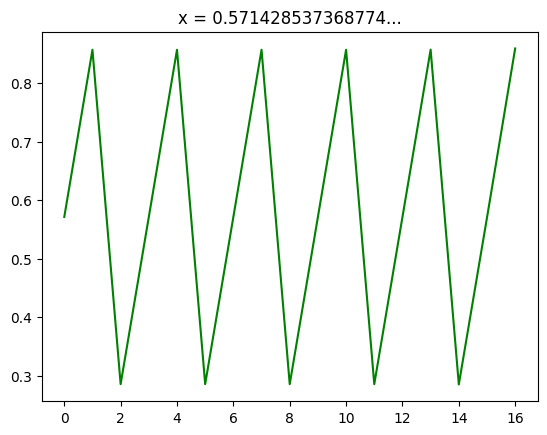

In [65]:
x = Decimal(0b1001001001001001001001 / 2**22)
orbita(x,0)
orbita_num(x,6,0)
orbita_graf_av(x,15,0)

5-ciclo

5 ciclo con x = 0.967741012573242187500000
Iteracion 0 : 0.967741906642913818359375
Iteracion 1 : 0.064516186714172363281250
Iteracion 2 : 0.129032373428344726562500
Iteracion 3 : 0.258064746856689453125000
Iteracion 4 : 0.516129493713378906250000
Iteracion 5 : 0.967741012573242187500000


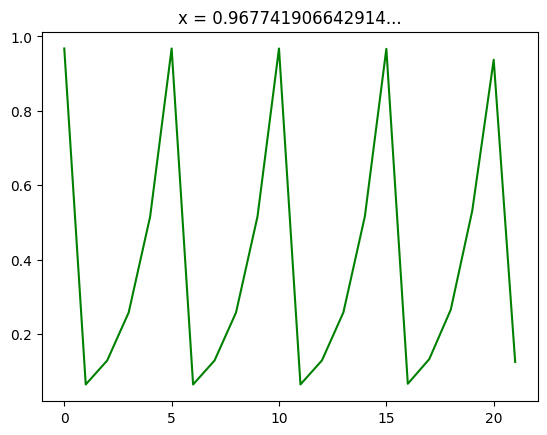

In [69]:
x = Decimal(0b111101111011110111101111 / 2**24)
orbita(x,0)
orbita_num(x,6,0)
orbita_graf_av(x,20,0)

7-ciclo

7 ciclo con x = 0.992125511169433593750000000
Iteracion 0 : 0.992125980556011199951171875
Iteracion 1 : 0.015748038887977600097656250
Iteracion 2 : 0.031496077775955200195312500
Iteracion 3 : 0.062992155551910400390625000
Iteracion 4 : 0.125984311103820800781250000
Iteracion 5 : 0.251968622207641601562500000


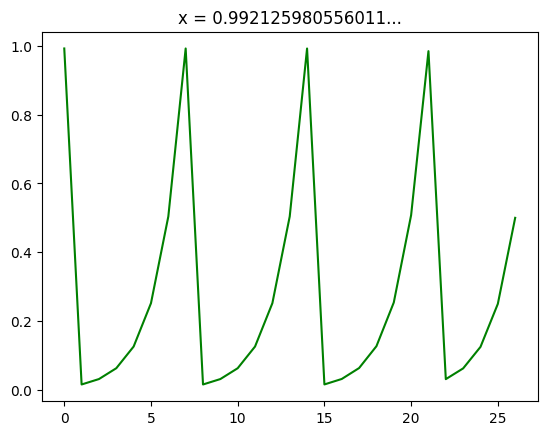

In [72]:
x = Decimal(0b111111011111101111110111111 / 2**27)
orbita(x,0)
orbita_num(x,6,0)
orbita_graf_av(x,25,0)

## Dos abiertos disjuntos de [0, 1] y una  orbita periodica para f que visite ambos